In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# データ準備

In [10]:
train = pd.read_csv('train.csv')

# 提出用にidを保持
ids = test['PassengerId']

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 棒グラフ

### 素人

In [7]:
p0 = train[train['Survived'] == 0].groupby('Pclass')['Survived'].count()
p0

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [12]:
p1 = train[train['Survived'] == 1].groupby('Pclass')['Survived'].count()
p1

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [22]:
p0.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

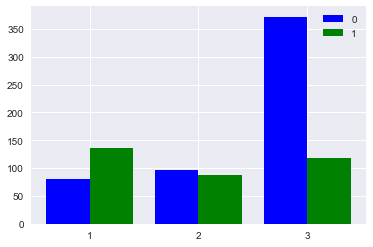

In [24]:
w = 0.4
left = p0.index
plt.bar(left, p0, color='b', width=w, label='0', align="center")
plt.bar(left + w, p1, color='g', width=w, label='1', align="center")

# 凡例を表示
plt.legend(loc="best")

# X軸の目盛りを書き換える
plt.xticks(left + w/2, left)

plt.show()

### プロ (seabornを使う人)

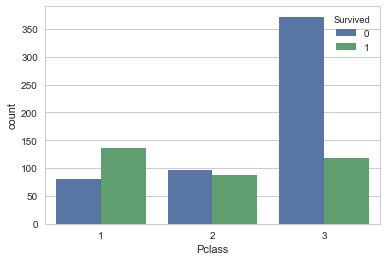

In [58]:
sns.countplot(x='Pclass',hue="Survived",data=train)

In [ ]:
その他プロっぽく

In [35]:
train_grpby = train.groupby(['Pclass'])
train_grpby.head()
train_grpby['Survived'].aggregate(sum)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

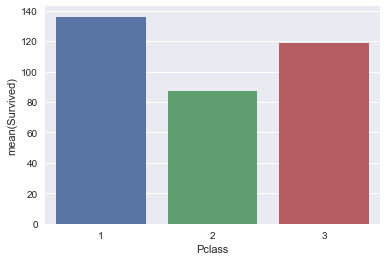

In [27]:
train_data_for_graph = train_grpby['Survived'].aggregate(sum).reset_index()
train_data_for_graph
sns.barplot(x='Pclass', y='Survived', data=train_data_for_graph)

* hueを抜いたらうまくいった。

In [17]:
train_grpby = train.groupby( ['Sex', 'Pclass'])
train_data_for_graph = train_grpby['Survived'].aggregate(sum).reset_index()
train_data_for_graph.head()

,Sex,Pclass,Survived
0,female,1,91
1,female,2,70
2,female,3,72
3,male,1,45
4,male,2,17


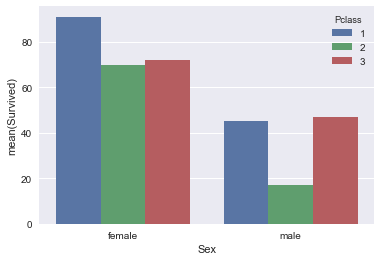

In [19]:
sns.barplot(x='Sex', y='Survived', hue= 'Pclass', data=train_data_for_graph)

## 棒グラフの意味。

> ある項目のデータを、長方形の図形を並べて表したグラフのことである。

> A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

> It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

In [ ]:
mean(平均値)しか表示しません。必要によって、boxplotやviolinplotを使ってください。

In [153]:
tips = sns.load_dataset("tips")
tips.groupby("day").count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [164]:
62+19+87+76

244

In [154]:
tips = tips.drop(tips[tips.day == 'Fri'].index).reset_index()
tips
#tips.groupby('day').count()
#tips = tips[tips.day != 'Thur']


,index,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


In [163]:
tips.day

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
5       Sun
6       Sun
7       Sun
8       Sun
9       Sun
10      Sun
11      Sun
12      Sun
13      Sun
14      Sun
15      Sun
16      Sun
17      Sun
18      Sun
19      Sat
20      Sat
21      Sat
22      Sat
23      Sat
24      Sat
25      Sat
26      Sat
27      Sat
28      Sat
29      Sat
       ... 
195     Sat
196     Sat
197     Sat
198     Sat
199     Sat
200     Sat
201     Sat
202     Sat
203     Sat
204     Sat
205     Sat
206     Sat
207     Sat
208     Sat
209     Sat
210     Sat
211     Sat
212     Sat
213     Sat
214     Sat
215     Sat
216     Sat
217     Sat
218     Sat
219     Sat
220     Sat
221     Sat
222     Sat
223     Sat
224    Thur
Name: day, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]

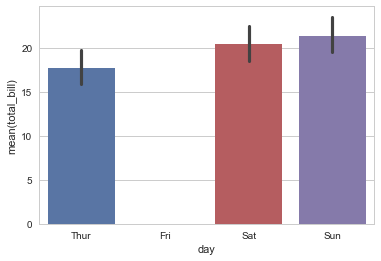

In [162]:
ax = sns.barplot(x='day', y="total_bill", data=tips)

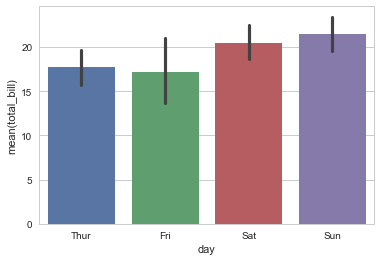

In [38]:
import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [ ]:
[Seaborn で件数や平均値を棒グラフで可視化する](http://pythondatascience.plavox.info/seaborn/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95)
